# GCC's ssc-cdi : ptychography pipeline for Carnaúba v0.1
 
- #### Questions? E-mail gcc@lnls.br
- #### Documentation about the ssc-cdi package: https://gcc.lnls.br/wiki/

## Imports

In [1]:
%matplotlib widget
import os, json, h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sscInstall
import sscCdi
import sscResolution
import time

print(f'sscCdi version: {sscCdi.__version__}')
print(f'sscResolution version: {sscResolution.__version__}')

sscCdi version: 0.6.12
sscResolution version: 0.5.8


## Inputs

In [2]:
input_dict = {
    
"beamline": "CNB",
"detector": "135D",

"data_path": "/ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/data/20220831_ANT1_ptycho__PiMega_001.hdf5",
"beamline_parameters_path": "/ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/proc/20220831_ANT1_ptycho_1.hdf5", #julia
    
"flatfield": "/ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/proc/2022-02-07_flatfield.h5py", 
"mask": "",

"CPUs": 64,
"GPUs": [0,1],

"DP_center": [1062,832],
"using_direct_beam": False,
'binning':1,
"apply_linearity_correction": False,
"detector_ROI_radius": 32,
"fill_blanks": False,
"keep_original_negative_values": False,
"suspect_border_pixels": 5,

"position_rotation": -3e-3,

"object_padding": 98,

"incoherent_modes": 7,
"probe_support": [ "cross", 20, 1, 25 ], # [ "cross", cross_width, border, center_width ], ["circular",radius]
"fresnel_number": -0.009,

"initial_obj":  ["complex_random"], #'/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/proc/20230307_ANT1_Ptycho_19/230602-11h33m_20230307_ANT1_Ptycho__PiMega_019.hdf5',
"initial_probe": ['inverse'], #'/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/proc/20230307_ANT1_Ptycho_19/230602-11h33m_20230307_ANT1_Ptycho__PiMega_019.hdf5', # ["inverse"], ["circular",radius], ["cross",15,3,20]
    
   "Algorithm1": {
      "Batch": 64,
      "Epsilon": 0.002,
      "Iterations": 20,
      "Name": "GL",
      "ObjBeta": 0.8,
      "ProbeBeta": 0.5,
      "TV": 0.002
   },
   "Algorithm2": {
      "Batch": 64,
      "Epsilon": 0.002,
      "Iterations": 100,
      "Name": "GL",
      "ObjBeta": 0.97,
      "ProbeBeta": 0.95,
      "TV": 0.0002
   },
   "Algorithm3": {
      "Batch": 64,
      "Beta": 0.995,
      "Epsilon": 0.001,
      "Iterations": 100,
      "Name": "RAAR",
      "ProbeCycles": 4,
      "TV": 0
   },
   "Algorithm4": {
      "Batch": 64,
      "Epsilon": 0.002,
      "Iterations": 100,
      "Name": "GL",
      "ObjBeta": 0.8,
      "ProbeBeta": 0.7,
      "TV": 0.0001
   },



    
}

input_dict = sscCdi.carnauba.cnb_ptycho_processing.define_paths(input_dict)

	Data path:  /ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/data/20220831_ANT1_ptycho__PiMega_001.hdf5
	Output path: /ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/proc


## Load diffraction data to find center

In [3]:
# fig, ax = plt.subplots(dpi=100)
# ax.imshow(np.squeeze(h5py.File(input_dict['data_path'],'r')['entry/data/data'])[0],norm=LogNorm(),cmap='jet')

# Run at Cluster

In [4]:
# server = sscInstall.connect_server()    

In [5]:
# json_filepath_path = sscCdi.cat_ptycho_processing.save_input_dictionary(input_dict)
# sscCdi.run_at_cluster(server,json_filepath_path,queue='cnb',gpus=input_dict["GPUs"],cpus=input_dict["CPUs"],jobName='JOB',script_path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/ssc-cdi-0.5.1/bin/carnauba_ptycho.py",slurm_path = '/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/inputs/')

# Run Locally

## Restoration

In [6]:
t0 = time.time()
diffraction_patterns = sscCdi.carnauba.cnb_restoration.restoration_CNB(input_dict) # restoration of all frames; restored DPs saved at output temporary folder
print(f"Restoration time: {(time.time()-t0)/60} min")

2023-06-07 14:12:07,839 - sscIO.io - INFO - -- Calling MPI code to read /ibira/lnls/beamlines/carnauba/apps/gcc-jupyter/00000000/data/20220831_ANT1_ptycho__PiMega_001.hdf5 with 64 processes
2023-06-07 14:12:12,113 - sscIO.io_mpi - INFO - Reading file metadata
2023-06-07 14:12:12,117 - sscIO.io_mpi - INFO - Output Shape (10100, 1536, 1536) int32
2023-06-07 14:12:12,118 - sscIO.io_mpi - INFO - {'shape': (10100, 1, 1536, 1536), 'dtype': dtype('int32'), 'imaging_type': 'pimega', 'slice_range': (0, 10099), 'y_range': (0, 1535), 'x_range': (0, 1535), 'n_scans': 1, 'nchannels': 1, 'n_timepoints': 1}
2023-06-07 14:12:12,118 - sscIO.io_mpi - INFO - Creating shared array
2023-06-07 14:12:12,121 - sscIO.io_mpi - INFO - Reading volume with MPI!
2023-06-07 14:12:45,242 - sscIO.io_mpi - INFO - 33.11927056312561s
2023-06-07 14:12:45,244 - sscIO.io_mpi - INFO - 2.9GB/s
2023-06-07 14:12:45,727 - sscIO.io - INFO - -- MPI command result: CompletedProcess(args=['mpirun', '--use-hwthread-cpus', '-n', '64',

ssc-pimega: creating 10100x64x64 shared array (SharedArray)
ssc-pimega: 10100 Images corrected within 176.13940715789795 sec
               Shared Array creation 0.0005755424499511719 sec
Restoration time: 4.081936013698578 min


## Ptychography

In [7]:
obj, probe, input_dict = sscCdi.carnauba.cnb_ptycho_processing.cnb_ptychography(input_dict,diffraction_patterns)
sscCdi.misc.save_variable(input_dict, obj,name='object')
sscCdi.misc.save_variable(input_dict,probe,name='probe')
sscCdi.misc.save_json_logfile(input_dict) 


Reading experiment parameters...
	Object pixel size = 33.75 nm
	Limit thickness for resolution of 1 pixel: 72.312 microns
Fresnel number: -0.009
Creating initial probe...
	Probe shape (64,64) with 7 incoherent mode(s)
Setting probe support...
Creating initial object...
Diffraction Patterns: (10100, 64, 64)
Initial Object: (496, 496)
Initial Probe: (7, 64, 64)
Probe Support: (7, 64, 64)
Probe Positions: (10100, 4)
Creating datapack...
Total datapack size: 0.17 GBs
Starting ptychography... using 2 GPUs [0, 1] and 64 CPUs
	Calling 20 iterations of GL algorithm...
	Done in: 1.30 seconds
	Calling 100 iterations of GL algorithm...
	Done in: 1.34 seconds
	Calling 100 iterations of RAAR algorithm...
	Done in: 7.95 seconds
	Calling 100 iterations of GL algorithm...
	Done in: 1.33 seconds


In [8]:
if 1: # phase
    preview = np.angle(obj)
else: # magnitude
    preview = np.abs(obj)

sscCdi.misc.deploy_visualizer(preview,title='Sinogram',cmap='gray')

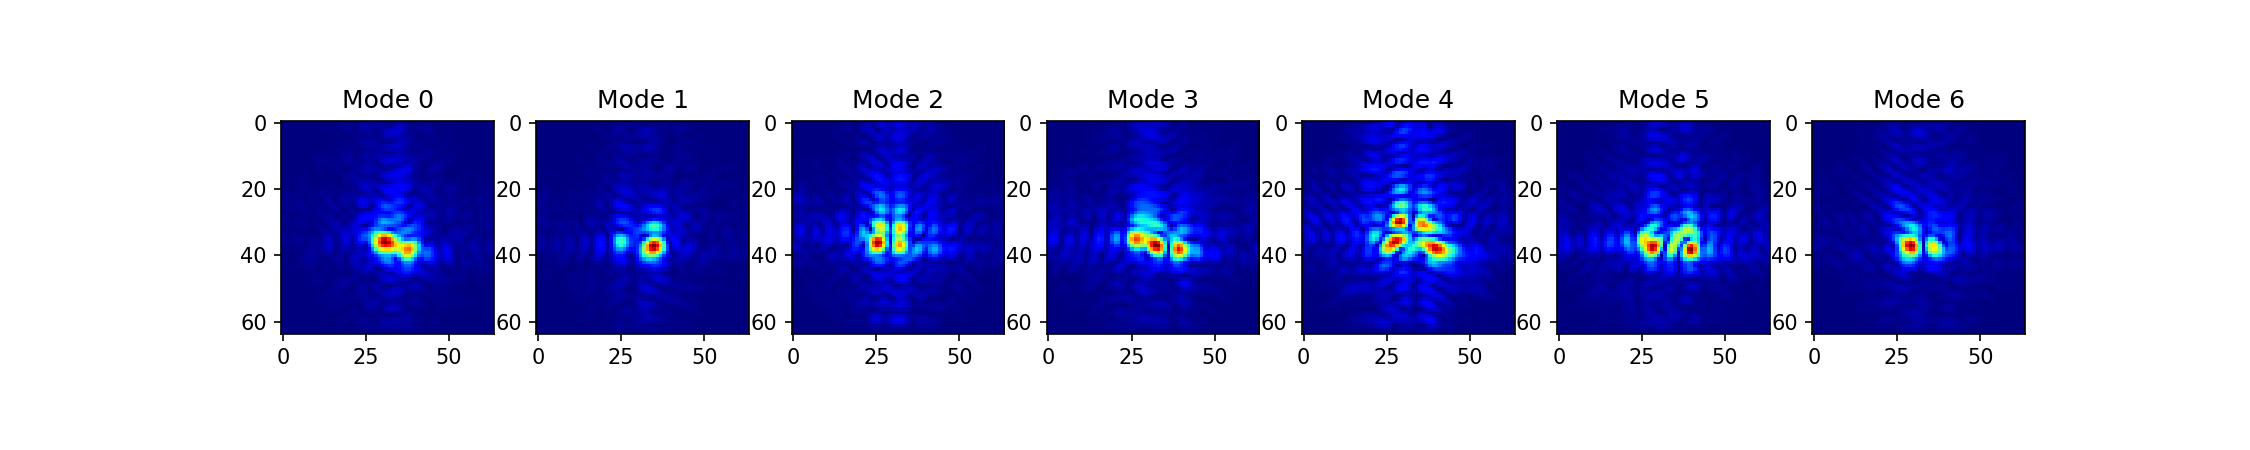

In [9]:
sscCdi.misc.plot_probe_modes(probe,contrast='magnitude',frame=0)

## Crop object

In [10]:
if 1: # phase
    cropped_object = np.angle(obj)
else: # magnitude
    cropped_object = np.abs(obj)
    
cropped_object = cropped_object[:,150:-150,150:-150]    

In [11]:
sscCdi.misc.deploy_visualizer(cropped_object,title='Cropped sinogram',cmap='gray')

## Unwrap object

In [12]:
phase = sscCdi.caterete.unwrap_in_parallel(cropped_object)
sscCdi.misc.save_variable(input_dict,phase, name = 'object_unwrapped')

Using 32 parallel processes


100%|██████████| 1/1 [00:00<00:00, 67.39it/s]


In [13]:
sscCdi.misc.deploy_visualizer(phase,title='Unwrapped',cmap='gray')

## Fourier Ring Correlation

	Resolution via halfbit criterion: 35.74 nm


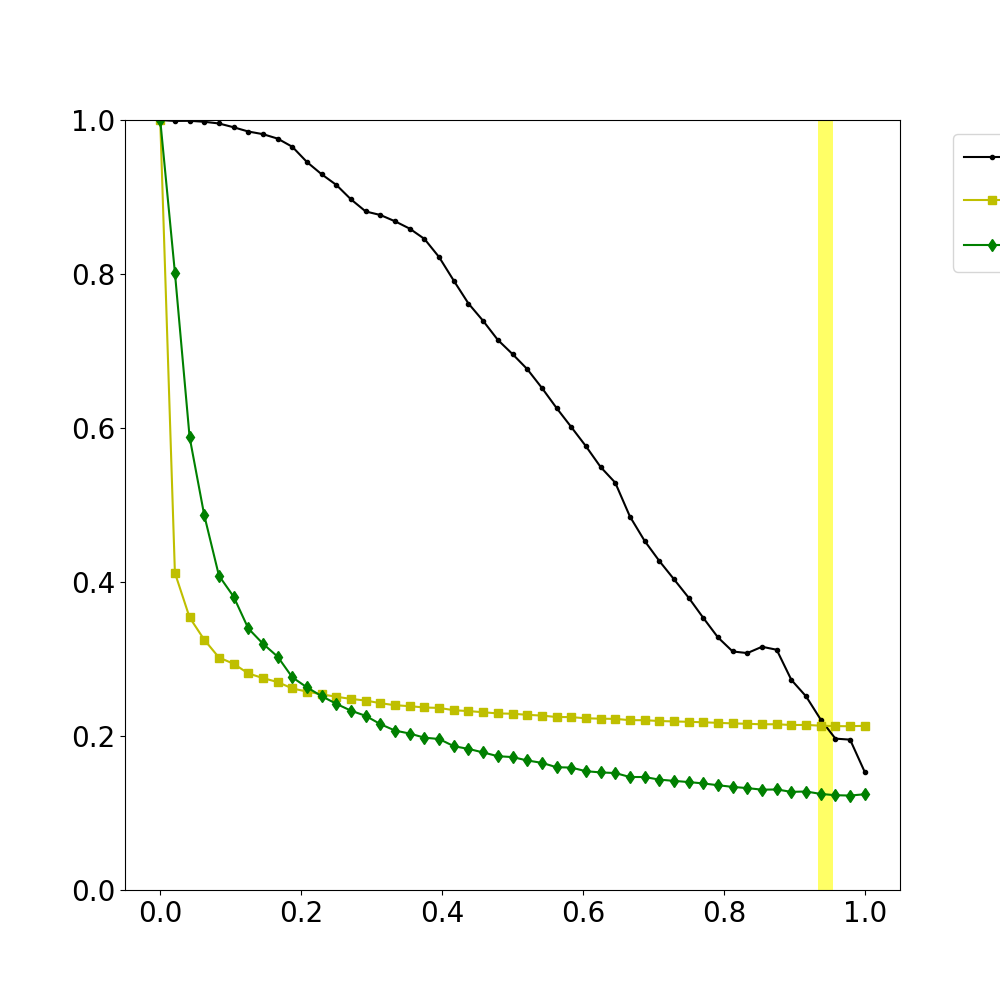

In [14]:
frame = 0

if 1: # FRC on phase image
    img = phase[frame]
else: # else, on absorption image
    img = np.abs(cropped_object)[frame]

# padding = 0
# sharpness = 10
# radius = 0.8
# img = sscResolution.frc.window( img, padding, [sharpness, radius]

dic = sscResolution.frc.computep( img  , input_dict["CPUs"] ) 
print(f"\tResolution via halfbit criterion: {1e9*input_dict['object_pixel']/dic['x']['H']:.2f} nm")

sscResolution.frc.plot(dic, {'label': "Resolution", 'unit': "nm", 'pxlsize': input_dict['object_pixel']*1e9} )